In [2]:
import os, h5py
import numpy as np

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
from astropy.table import Table, join

In [5]:
from provabgs import util as UT
from provabgs import infer as Infer
from provabgs import models as Models
from astropy.cosmology import Planck13

m_nmf = Models.NMF(burst=True, emulator=True)

/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [6]:
mass_cat = Table.read('/global/cfs/projectdirs/desi/users/asainton/SpectroPhot/MassComparisonCatalog.fits')

In [7]:
bgs = Table.read('/global/cfs/cdirs/desicollab/science/gqp/stellar_mass_comparison/bgs-test.fits')

In [8]:
mass_cat = join(bgs, mass_cat['TARGETID', 'LOGMSTAR_PROVABGS', 'LOGMSTAR_CIGALE'], keys='TARGETID', join_type='left')

In [9]:
mass_cat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPECTYPE,DESI_TARGET,Z,TARGET_RA,TARGET_DEC,RELEASE,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,zmag,zmag_err,Spectra_Path,LOGMSTAR_PROVABGS,LOGMSTAR_CIGALE
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass
int64,bytes7,bytes6,int32,bytes6,int64,float64,float64,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes111,float64,float64
39627525587994928,main,dark,49042,GALAXY,1152921504606912513,0.37546073202167357,311.7601671179034,-11.124256151561058,9010,5.5283895,27.335518,61.249336,95.035576,62.711967,82.85198,873.9397,415.1351,84.57296,14.5119095,1.2841756,0.37644753,0.00062770676,9.947553e-06,0.84234035,0.89085555,0.93739915,0.99022573,0.99398595,0.9987143,0.99951434,1.7326922,8.567421,19.196594,18.032246,0.0046433187,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/dark/490/49042/coadd-main-dark-49042.fits,11.436534881591797,11.376181025109835
39627543401209880,main,dark,49048,QSO,5764607523034497028,1.032680925805135,310.7213844492672,-10.300520726997934,9010,6.3964405,9.581076,9.421429,45.371456,70.82873,102.601364,-829.487,1192.5941,476.24927,113.61319,2.1035423,0.48899645,0.0005884716,7.980631e-06,0.83622634,0.8864947,0.93482965,0.98981285,0.9937314,0.99865973,0.9994937,4.9825735,7.4632783,7.338919,20.064709,0.010758188,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/dark/490/49048/coadd-main-dark-49048.fits,-999.0,10.266329506568452
39627547499037718,main,bright,25752,GALAXY,1152921504606846976,0.34311102099542545,198.3741518743816,-9.911997840793028,9010,7.1162767,17.437164,28.8187,28.095428,17.514656,-7.487842,-179.32936,84.82725,15.179897,3.767898,1.8725935,0.44508502,0.0010254296,1.5360456e-05,0.8910005,0.92520297,0.95744663,0.9934146,0.9959505,0.99913496,0.9996733,1.1392107,2.7914324,4.613448,18.850815,0.019237472,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/bright/257/25752/coadd-main-bright-25752.fits,11.262696266174316,10.533792980487325
39627547540979895,main,bright,25748,GALAXY,1152921504606912513,0.5520356369039029,200.8041358466278,-9.880574462729559,9010,3.5197535,13.514108,35.727364,107.03752,64.031494,196.78941,711.49133,217.82162,60.389214,27.76155,1.5008109,0.44908565,0.0009818029,1.4212834e-05,0.86672306,0.9081451,0.94753224,0.9918447,0.9949837,0.998928,0.9995951,1.354867,5.2020173,13.752618,18.617498,0.0057523875,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/bright/257/25748/coadd-main-bright-25748.fits,11.686508178710938,11.504598311262095
39627547540981371,main,bright,25748,GALAXY,1152921504606912513,0.5939925866628201,200.9343608123766,-10.113570774515054,9010,3.983202,15.002518,42.555107,73.11014,31.727098,57.85973,-326.51465,22.562885,6.764224,4.3806486,0.88640195,0.24314895,0.0006508359,1.1854732e-05,0.8928125,0.92647,0.9581798,0.99353015,0.9960217,0.9991502,0.999679,0.5559497,2.093955,5.9395685,18.42762,0.012122039,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/bright/257/25748/coadd-main-bright-25748.fits,12.155157089233398,11.445061285935031
39627547540981702,main,bright,25748,GALAXY,1152921504606846976,0.4546186283755647,200.95915547932793,-9.87994320813639,9010,3.2776084,8.22544,13.875394,19.418457,15.867657,117.43821,694.6586,233.39609,73.82101,31.182089,2.4316757,0.53439134,0.0009734355,1.3069628e-05,0.88269436,0.9193841,0.9540737,0.9928821,0.99562263,0.9990648,0.9996468,1.1070225,2.7781682,4.6864576,19.644386,0.013923196,/global/cfs/cdirs/desi/spectro/redux/guadalupe/healpix/main/bright/257/25748/coadd-main-bright-25748.fits,11.039480209350586,10.406339171108662
39

In [10]:
logmstar_provabgs = mass_cat['LOGMSTAR_PROVABGS']
logmstar_cigale = mass_cat['LOGMSTAR_CIGALE']

In [11]:
low_outlier = (logmstar_cigale > logmstar_provabgs + 1.5) & (logmstar_provabgs != -999.)
print(np.sum(low_outlier))

370


(6.0, 14.0)

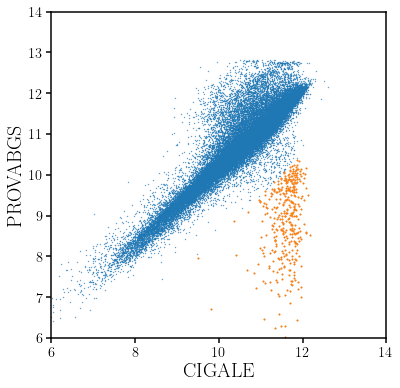

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(logmstar_cigale, logmstar_provabgs, s=0.1)
plt.scatter(logmstar_cigale[low_outlier], logmstar_provabgs[low_outlier], s=1)
plt.xlabel('CIGALE', fontsize=20)
plt.xlim(6, 14)
plt.ylabel('PROVABGS', fontsize=20)
plt.ylim(6, 14)

<Closed HDF5 file>

0.32590034335108237 9.597602844238281 11.601346282951598 0.32590034335108237


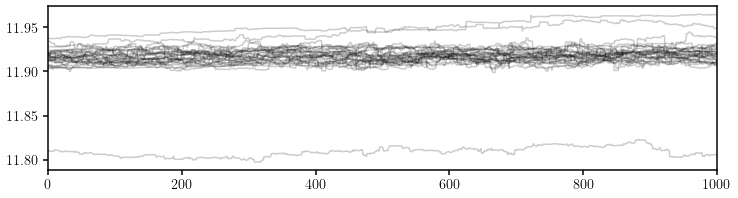

0.992382155776478
[9.597603]


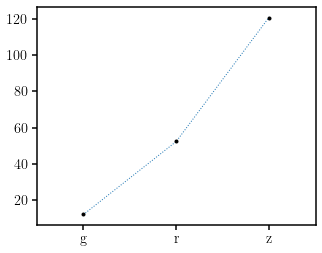

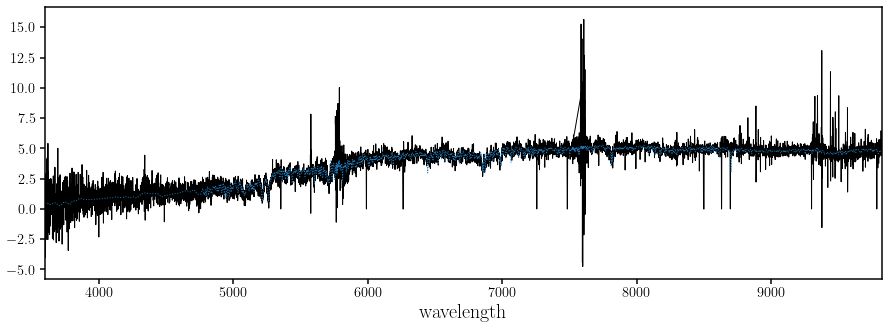

0.1973309687347618 8.47049617767334 11.000516573925971 0.1973309687347618


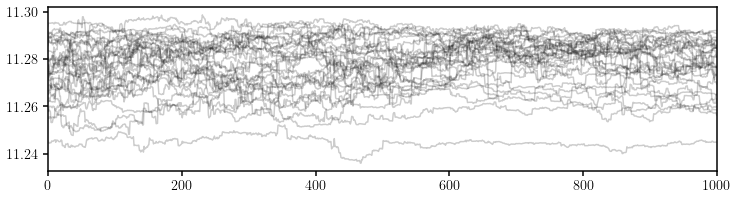

0.9975578005655502
[8.470496]


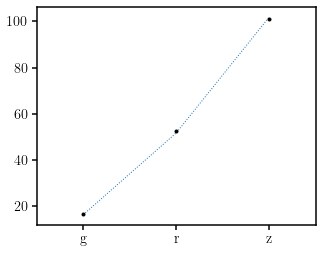

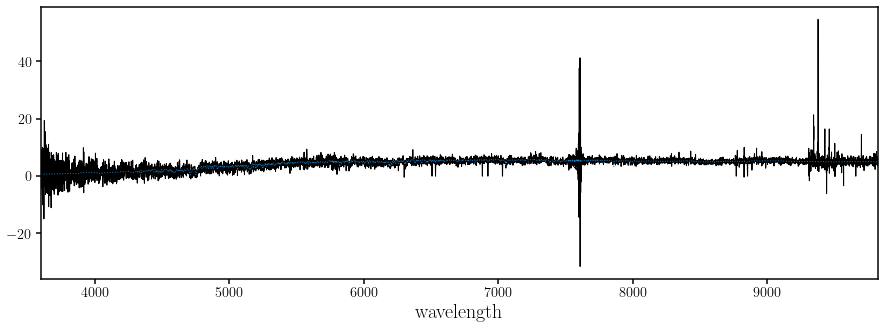

0.3476096870185759 9.761407852172852 11.779362954397385 0.3476096870185759


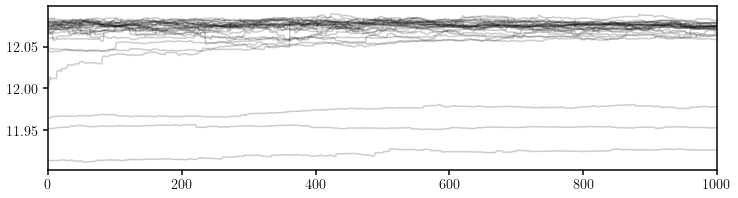

0.9919746516658274
[9.761408]


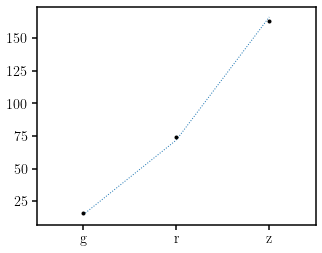

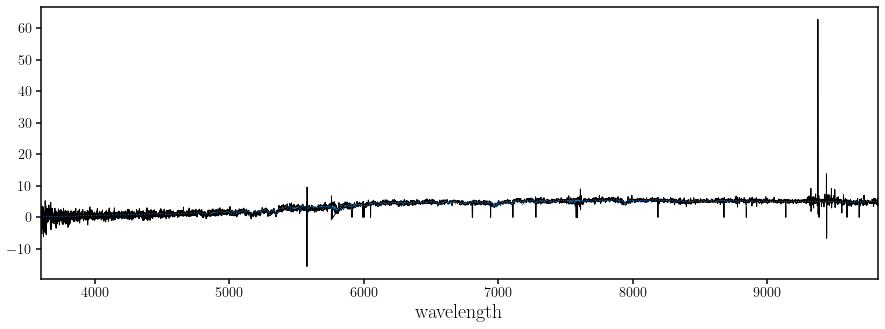

0.3786691802440694 8.625704765319824 11.939435333312916 0.3786691802440694


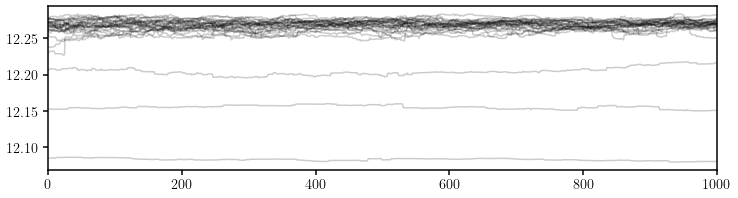

0.9996292292433006
[8.625705]


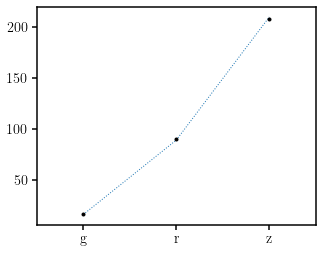

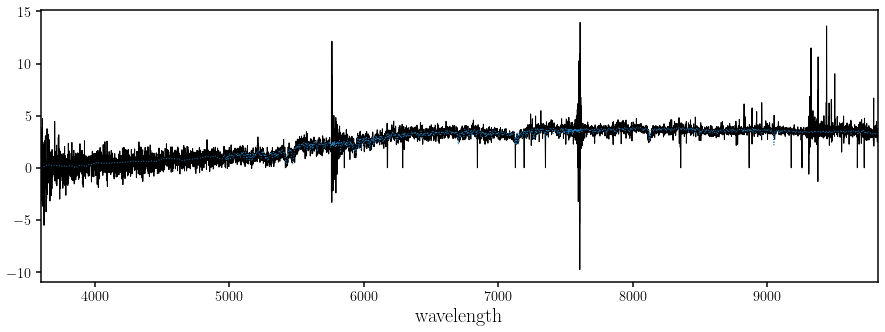

0.28533027117142307 10.054160118103027 11.751669761325862 0.28533027117142307


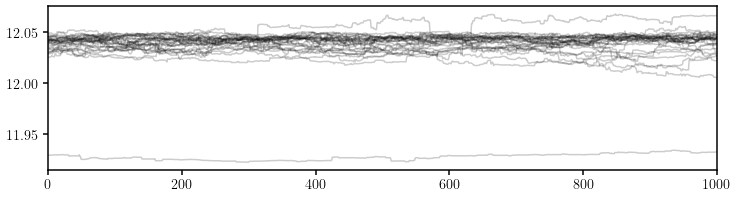

0.9826286073581868
[10.05416]


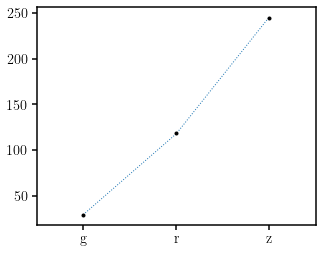

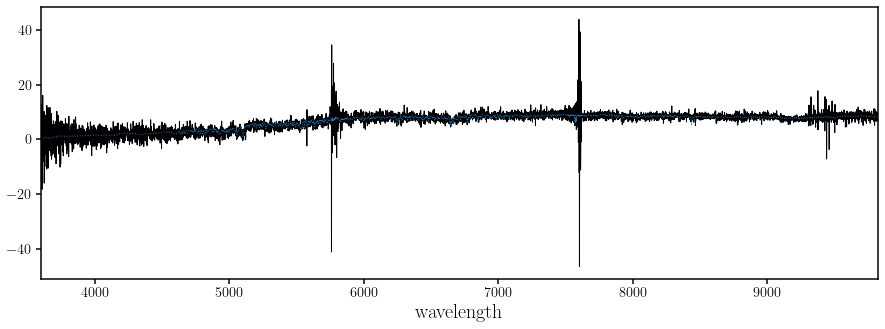

0.2579772998208475 9.664493560791016 11.596966460661129 0.2579772998208475


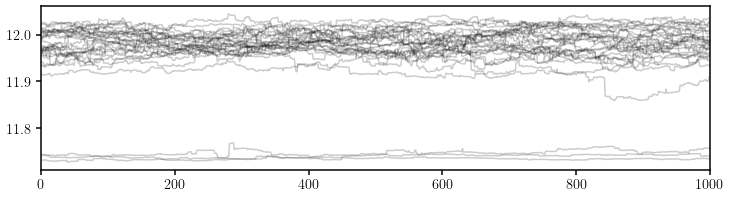

0.9922443649244518
[9.664494]


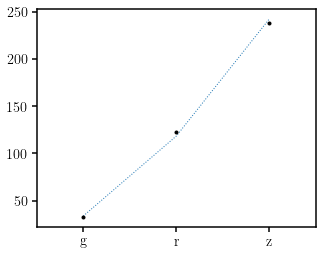

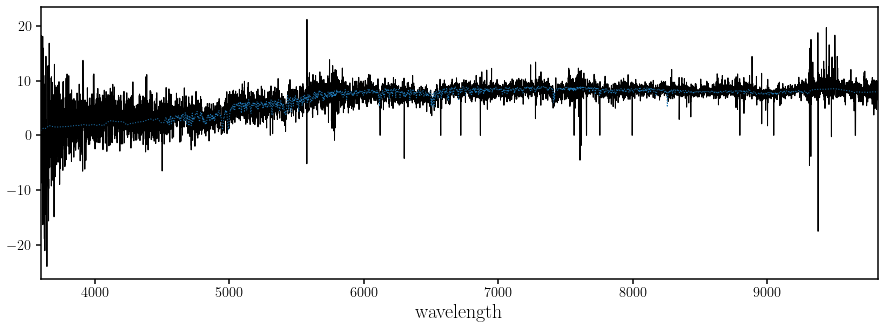

0.3410714199730248 10.120748519897461 11.838228772696143 0.3410714199730248


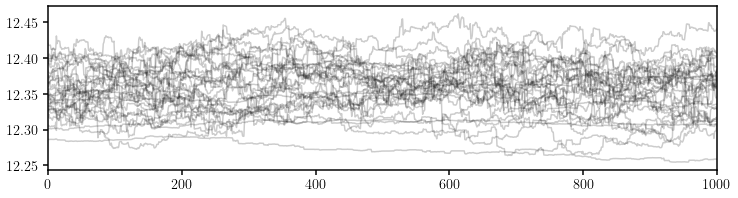

0.9908652538901891
[10.1207485]


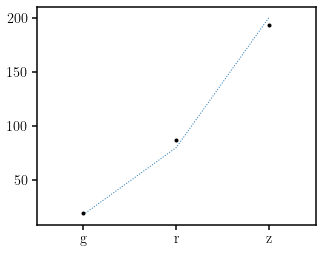

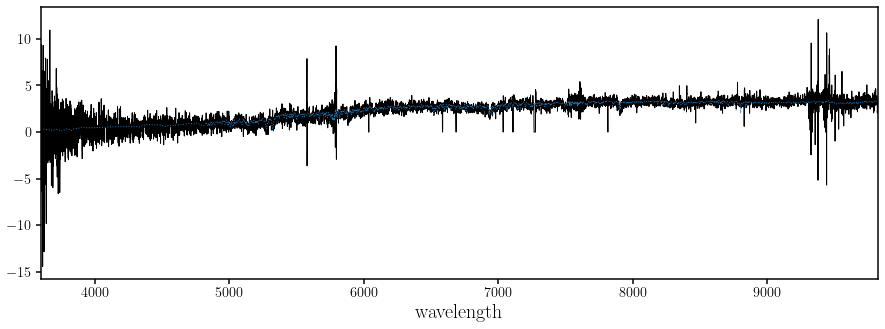

0.31013243045438055 8.605203628540039 11.583066000899484 0.31013243045438055


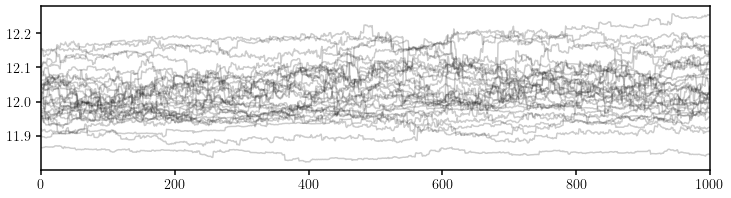

0.9995430020400236
[8.605204]


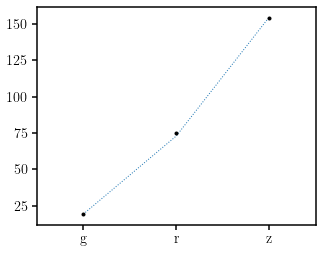

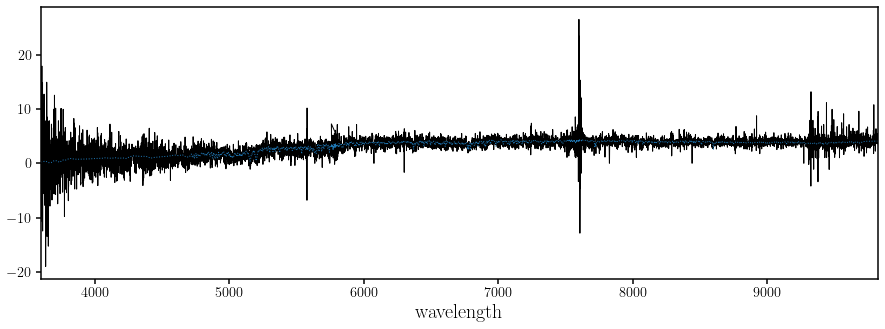

0.23528466664821973 10.234180450439453 11.785934270851211 0.23528466664821973


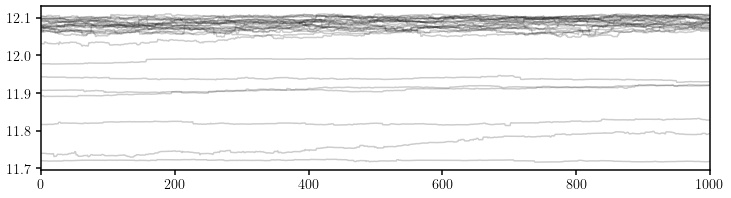

0.9771265478487003
[10.23418]


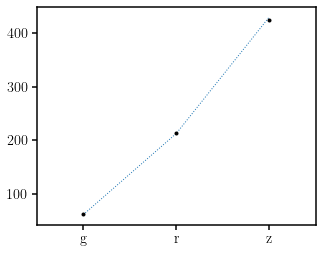

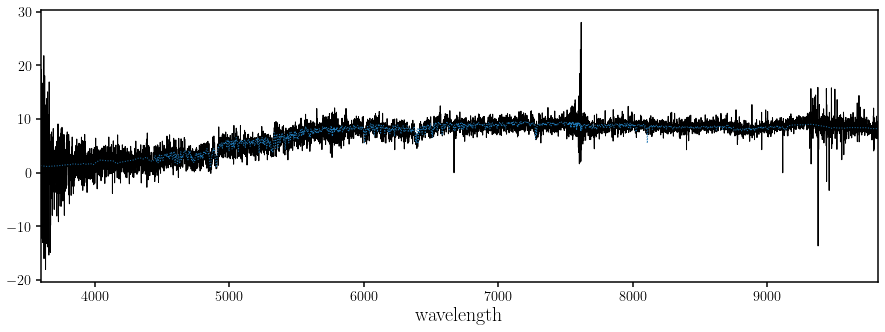

0.2876827699095583 9.509297370910645 11.104572108125637 0.2876827699095583


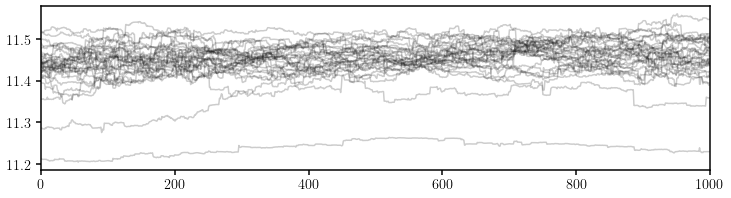

0.9813716291193135
[9.509297]


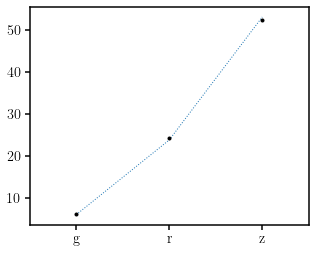

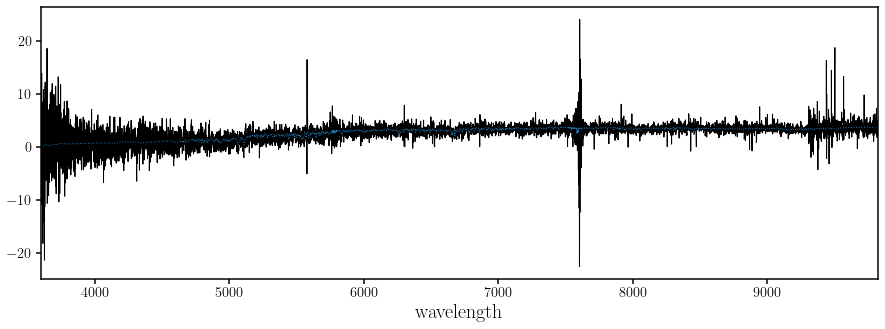

In [19]:
dat_dir = '/global/cscratch1/sd/chahah/provabgs/challenge/stellar_mass'


for ii in np.arange(len(mass_cat))[low_outlier][:10]:
    igal = np.arange(len(bgs))[bgs['TARGETID'] == mass_cat['TARGETID'][ii]][0]
    fname = os.path.join(dat_dir, f'bgs_test.{igal}.hdf5')
    if not os.path.isfile(fname): continue 

    with h5py.File(fname, 'r') as fhpix:
        if 'redshift' not in fhpix.keys():
            print()
            print('gal %i is problematic' % hpix)
            print()
            continue
        zreds = fhpix['redshift'][...]
        print(zreds, logmstar_provabgs[ii], logmstar_cigale[ii], mass_cat['Z'][ii])
        # get posterior samples and log probabilities
        _logp = fhpix['log_prob'][...][-1000:].flatten()
        _theta = fhpix['mcmc_chain'][...][-1000:]
        
        fig = plt.figure(figsize=(12,3))
        sub = fig.add_subplot(111)
        sub.plot(_theta[:,:,0], c='k', alpha=0.2)
        sub.set_xlim(0., 1e3)
        plt.show()
        
        _theta = _theta.reshape((_theta.shape[0] * _theta.shape[1], _theta.shape[2]))
        
        # get best-fit theta
        theta_bfs = _theta[np.argmax(_logp)]
        print(theta_bfs[5])
        # calculate M* (surviving stellar mass)
        tage = Planck13.age(zreds).value
        print(np.log10(m_nmf._surviving_mass(theta_bfs[:12], tage)))
        #print(np.log10(m_nmf._surviving_mass(theta_bfs[:12], tage, emulator=False)))

        fig = plt.figure(figsize=(5,4))
        sub = fig.add_subplot(111)
        sub.errorbar(np.arange(3), fhpix['flux_photo_obs'][...], 
                     yerr=fhpix['flux_ivar_photo_obs'][...]**-0.5, 
                     fmt='.k')
        sub.plot(np.arange(3), fhpix['flux_photo_model'][...], c='C0', lw=1, ls=':')
        sub.set_xticks([0, 1, 2])
        sub.set_xticklabels(['g', 'r', 'z'])
        sub.set_xlim(-0.5, 2.5)
        plt.show()
        
        fig = plt.figure(figsize=(15,5))
        sub = fig.add_subplot(111)
        sub.plot(fhpix['wavelength_obs'][...], fhpix['flux_spec_obs'][...], c='k', lw=1, label='DESI')
        sub.plot(fhpix['wavelength_obs'][...], fhpix['flux_spec_model'][...], c='C0', lw=1, ls=':', label='best-fit')
        sub.set_xlabel('wavelength', fontsize=20)
        sub.set_xlim(fhpix['wavelength_obs'][...].min(), fhpix['wavelength_obs'][...].max())
        plt.show()

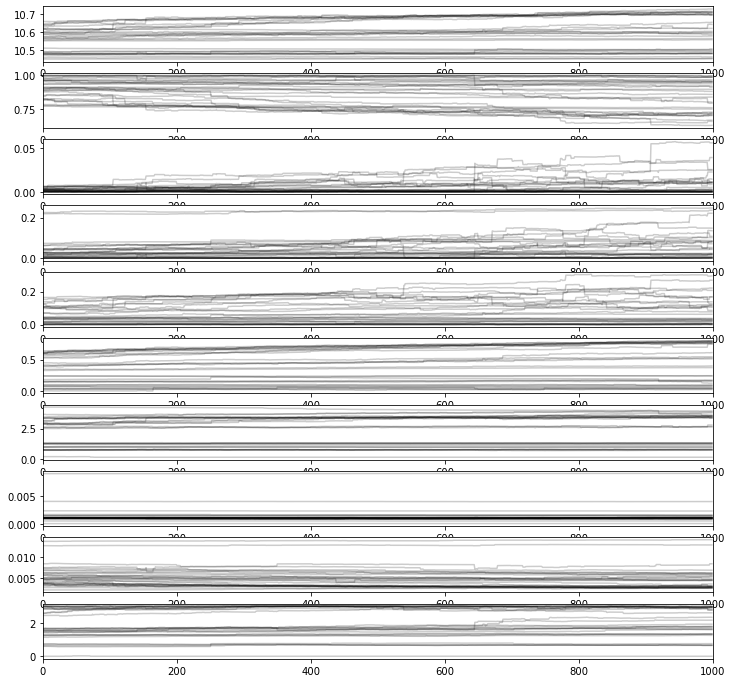

In [15]:
fig = plt.figure(figsize=(12,12))
for i in range(10): 
    sub = fig.add_subplot(10,1,i+1)
    sub.plot(_theta[:,:,i], c='k', alpha=0.2)
    sub.set_xlim(0., 1e3)